# **Tarea 01.- Ajuste lineal usando Scipy**
---
## *Subcoordinación de Posgrado y Educación Continua.*
### [Instituto Mexicano de Tecnología del Agua](https://www.gob.mx/imta).<br>

<img src="Imagenes/imta_logo.png" style="height: 5em; vertical-align: middle;">
<img src="Imagenes/Mexico.jpg" style="height: 5em; vertical-align: middle;">

**Alumno: Ing. Omar Ulises Robles Pereyra** <br>
**Docente: Dr. Gabriel Ruiz Martinez** <br>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OmarURP/Incertidumbre/blob/main/Curso_Incetidumbre.ipynb)

---

#### **Instrucciones:**
Completar y ejecutar el código que se encuentra en el archivo `ajuste_curvas_Scipy.py` usando los datos del archivo `exptermi.csv`. 

#### **Importando las librerías necesarias:** <br>
- `pandas` Manejo de dataframes.
- `curve_fit` de `scipy` para ajuste de curvas.
- `r2_score` de `sklearn.metrics` para calcular el coeficiente de determinación.
- `matplotlib.pyplot` para graficación

In [10]:
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#### **Regresión en mínimos cuadrados**

Cuando tenemos un conjunto de datos, a menudo queremos encontrar una línea o curva que represente la tendencia general de esos datos. El método de regresión por mínimos cuadrados nos ayuda a hacer exactamente eso: **encontrar la función matemática que mejor se ajusta a nuestros puntos**. <br>

Principio: Se busca minimizar la suma de los cuadrados de las diferencias verticales (llamadas "residuos" o "errores") entre los valores reales de nuestros datos y los valores que predice nuestra función.<br>

El caso más común es ajustar datos a una línea recta, que tiene la forma:
$$y=Ax+B$$
Nuestro objetivo es encontrar los coeficientes $A$ (pendiente de la recta) y $B$ (intercepción con el eje y), que hagan que la línea pase ***"lo más cerca"*** posible de todos los puntos a la vez.

In [11]:
# Definición del modelo lineal
def model01(x, m, b):
    return (m*x) + b

In [12]:
# Cargando los datos desde el archivo CSV
namefile = './Datos/exptermi.csv'
print(f"Cargado archivo: {namefile}")

Cargado archivo: ./Datos/exptermi.csv


In [13]:
# Cargando los datos con pandas
datos = pd.read_csv(namefile, sep=r',', header=None)
print(datos)

     0      1
0    0  6.495
1    1  6.665
2    2  6.755
3    3  6.565
4    4  6.595
5    5  6.505
6    6  6.625
7    7  6.515
8    8  6.635
9    9  6.625
10  10  6.715
11  11  6.555
12  12  6.635
13  13  6.625
14  14  6.575
15  15  6.395
16  16  6.485
17  17  6.715
18  18  6.655
19  19  6.775
20  20  6.555
21  21  6.655
22  22  6.605
23  23  6.685


#### **Renombrando las columnas**
- Columna 0 = 'nrm'
- Columna 1 = 'v'

In [14]:
# Renombrando la columna 0 por 'nrm' y la columna 1 por 'v'
datos = datos.rename(columns={0: 'nrm', 1: 'v'})
print(datos)

    nrm      v
0     0  6.495
1     1  6.665
2     2  6.755
3     3  6.565
4     4  6.595
5     5  6.505
6     6  6.625
7     7  6.515
8     8  6.635
9     9  6.625
10   10  6.715
11   11  6.555
12   12  6.635
13   13  6.625
14   14  6.575
15   15  6.395
16   16  6.485
17   17  6.715
18   18  6.655
19   19  6.775
20   20  6.555
21   21  6.655
22   22  6.605
23   23  6.685


x= [6.495 6.665 6.755 6.565 6.595 6.505 6.625 6.515 6.635 6.625 6.715 6.555
 6.635 6.625 6.575 6.395 6.485 6.715 6.655 6.775 6.555 6.655 6.605 6.685]
y= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


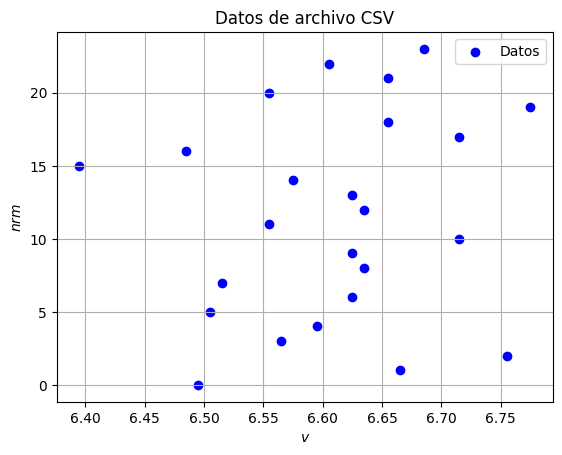

In [15]:
# Asignando los valores de las columnas x='v' y y='nrm'
x = datos['v'].values
y = datos['nrm'].values
print(f"x= {x}")
print(f"y= {y}")

# Graficando los datos
plt.scatter(x, y, label='Datos', color='blue')
plt.xlabel('$v$')
plt.ylabel('$nrm$')
plt.title('Datos de archivo CSV')
plt.legend()
plt.grid()
plt.show()

#### **Función [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)**
`Curve_fit` automatiza el proceso de encontrar los parámetros de una función que mejor se ajusten a nuestros datos. En lugar de que nosotros tengamos que calcular todas las sumatorias para los coeficientes A y B, curve_fit lo hace por nosotros. No está limitada a líneas rectas, es posible usarla para ajustarla a funciones matemáticas como: exponencial, logarítmica, seno, etc.) <br>
Los parámetros de entrada de la función son:<br>

**curve_fit($f$, $xdata$, $ydata$)**<br>
Donde: $f$ es la función matemática, $xdata$ es la variable independiente e $y$ es la variable dependiente. <br>

La función devuelve dos resultados:
- `popt:` Es un arreglo con los valores óptimos de los parámetros **A y B** enunciados en celdas anteriores.
- `pcov:` Una matriz de **covarianza**, que mide la relación entre los parámetros calculados.


popt= [ 11.31553567 -63.28154641]
--------
pcov= [[  269.93448417 -1783.92951561]
 [-1783.92951561 11791.6762033 ]]
--------
y_pred= [10.21285779 12.13649885 13.15489706 11.00494528 11.34441135 10.32601314
 11.68387742 10.4391685  11.79703278 11.68387742 12.70227563 10.89178993
 11.79703278 11.68387742 11.11810064  9.08130422 10.09970243 12.70227563
 12.02334349 13.38120777 10.89178993 12.02334349 11.45756671 12.36280956]
--------


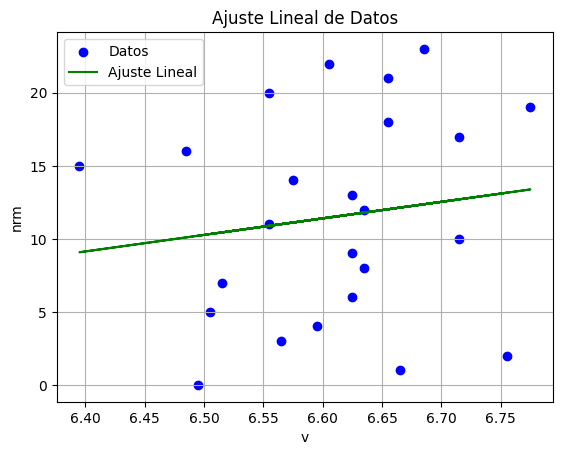

--------
Ecuacion de ajuste:
y = 11.3155 * x  + (-63.2815) con R^2 = 0.0211


In [16]:
popt, pcov = curve_fit(model01, x, y)
print(f"popt= {popt}")
print("--------")
print(f"pcov= {pcov}")
print("--------")

y_pred = (popt[0]*x) + popt[1]
print(f"y_pred= {y_pred}")
print("--------")
# Calculando el coeficiente de determinación R^2
coef_deter = r2_score(y, y_pred)
#print(f'R^2 = {coef_deter:.4f}')


# Graficando los datos y la recta de ajuste
plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, y_pred, 'g-', label='Ajuste Lineal')
plt.xlabel('v')
plt.ylabel('nrm')
plt.title('Ajuste Lineal de Datos')
plt.legend()
plt.grid()
plt.show()
print("--------")
print("Ecuacion de ajuste:")
# Imprimiendo la ecuacion de ajuste
print(f"y = {popt[0]:.4f} * x  + ({popt[1]:.4f}) con R^2 = {coef_deter:.4f}")

#### **Comparando resultados con Excel**
![Excel_png](Imagenes/Excel.png)

### **Anexo: Covarianza**
La covarianza es una medida estadística que indica la relación entre dos variables. Nos dice cómo cambian dos variables juntas, si tienden a aumentar o disminuir simultáneamente, o si aumenta mientras la otra disminuye. En otras palabras, la covarianza muestra la dirección de la relación entre dos variables.
- **Covarianza positiva:** Indica que las variables tienden a moverse en la misma dirección. Cuando una aumenta, la otra también tiende a aumentar, y viceversa.
- **Covarianza negativa:** Indica que las variables tienden a moverse en direcciones opuestas. Cuando una aumenta, la otra tiende a disminuir, y viceversa.
- **Covarianza cero:** Indica que no hay una relación lineal clara entre las variables, o que no existe una relación lineal.

**Ejemplo:** Si medimos el tiempo que alguien dedica a estudiar y su calificación en un examen, podríamos esperar una covarianza positiva, ya que a más tiempo dedicado al estudio, generalmente se obtiene una mejor calificación. 